GroupGal : 83093
EnvMeasures : 67996
EnvMeasures : 56228
visualMorph : 38795
['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG']
Joining envMeasures VisualMorph 8932
8932
['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIS

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_13842/3893178798.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bin'] = pd.cut(df2['CoSepIterCen'], n)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10]
                  bin  ELLIPTICAL_CODE  Counts  colidx
0   (-0.00121, 0.121]                1    1319       1
1   (-0.00121, 0.121]                2     233       1
2   (-0.00121, 0.121]               10    3978       1
3      (0.121, 0.243]                1     351       2
4      (0.121, 0.243]                2      80       2
5      (0.121, 0.243]               10    1649       2
6      (0.243, 0.364]                1     156       3
7      (0.243, 0.364]                2      19       3
8      (0.243, 0.364]               10     530       3
9      (0.364, 0.485]                1      69       4
10     (0.364, 0.485]                2       8       4
11     (0.364, 0.485]               10     215       4
12     (0.485, 0.606]                1      42       5
13     (0.485, 0.606]                2       2       5
14     (0.485, 0.606]               10     120       5
15     (0.606, 0.728]     

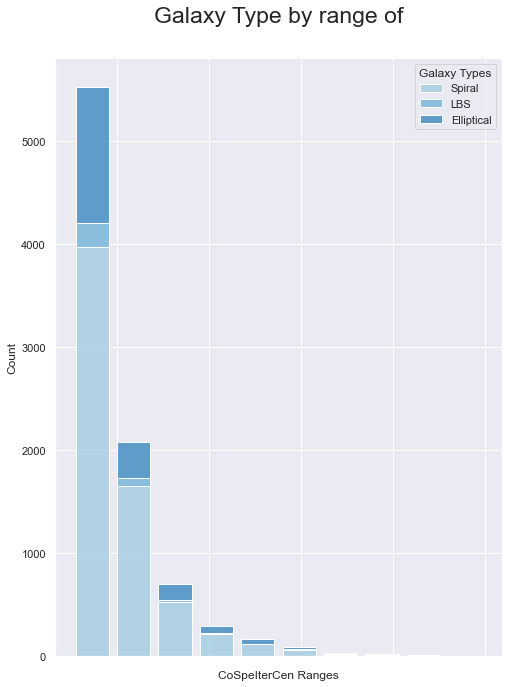

In [55]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statistics as st

#ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
#print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
print(f"EnvMeasures : {len(envMeasures)}")

#envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
print(visualMorph.colnames)
## Clean Data
#visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
#visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] != 0]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] < 50]

RErange = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')
print('Joining envMeasures VisualMorph '+str(len(RErange)))
print(len(RErange))
print(RErange.colnames)

alphaVal = .3
binCount = 100

#df2 = (df["ELLIPTICAL"] == '1') + (df["ELLIPTICAL"] == '11') + (df["ELLIPTICAL"] == '12')
#df2.columns=["E","S0-Sa","Sb0-SBa"]
#print(df2)


#xfields = ['CoSepIterCen','CoSepBCG','CoSepCen']
xfields = ['CoSepIterCen']

#for i,xfield in enumerate(xfields,1) :
#     sns.set(rc={'figure.figsize':(10,8)})
#     df = RErange.to_pandas()
#     df["bin"] = pd.cut(df[xfield], 5)
#     df["Counts"] = df.value_counts('ELLIPTICAL_CODE')   
#     sns.barplot(x="bin", y="Counts",data=df)
#     sns.histplot(x="bin",y="ELLIPTICAL_CODE"),data=df,multipl='stack')
#  plt.show()
    

n = 10
r = 3
df = RErange.to_pandas()    
#xfield = ['CoSepIterCen']
df2 = df[['ELLIPTICAL_CODE','CoSepIterCen']]
df2['bin'] = pd.cut(df2['CoSepIterCen'], n)
df3 = df2.groupby(['bin','ELLIPTICAL_CODE']).size().reset_index(name='Counts')
lst = []
for i in range(1,n+1) :
  lst = lst + [i]*r 
print(lst)
df3['colidx']=lst
print(df3)
df4=df3.set_index(['colidx','ELLIPTICAL_CODE'])
print(df4)
#df4=df3.set_index(['bin'])
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#fig = plt.gcf()
#fig.set_size_inches( 16, 10)
g=sns.histplot(df4, x='colidx', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
g.set_title('Galaxy Type by range of', fontsize = 23, y =1.05);
g.set_xlabel('CoSpeIterCen Ranges')
#g.set_xlim([1,7])
g.set(xticklabels=[])
plt.legend(title='Galaxy Types', loc='upper right', labels=['Spiral', 'LBS','Elliptical'])
plt.rcParams["figure.figsize"]=(6,12)
plt.show(g)



